In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [78]:
# total number of actions
tot_actions = df.action.shape[0]
tot_actions

8188

In [79]:
# number of unique users
unique_users = df.id.unique().shape[0]
unique_users

6328

In [80]:
# size of control group and experiment group
size_control = df[df.group=="control"].id.nunique() # control 
size_experiment = df[df.group == "experiment"].id.nunique() # experiment
size_control,size_experiment

(3332, 2996)

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [81]:
# duration of this experiment
tot_row = df.shape[0]
pd.to_datetime(df.timestamp[tot_row-1]) - pd.to_datetime(df.timestamp[0])

Timedelta('115 days 16:41:40.789831')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [82]:
# action types in this experiment
df.action.unique()

array(['view', 'click'], dtype=object)

### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

The control and experiment pages could have different numbers of total visitors

More total clicks could occur in one version, even if there is a greater percentage of clicks in the other version.

### 5. Define the click through rate (CTR) for this experiment.

The number of unique visitors who click at least once divided by the number of unique visitors who view the page

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $$
$$H_1: $$

In [83]:
# unique number of id who clicked from 'control' group
click_control = df.query('group == "control" and action == "click"').id.nunique()
# unique number of id who viewed from 'control' group 
view_control = df.query('group == "control" and action == "view"').id.nunique()

In [84]:
# CTR(old)
CTR_old = click_control / view_control 

In [85]:
# unique number of id who clicked from 'experiment' group
click_experiment = df.query('group == "experiment" and action == "click"').id.nunique()
# unique number of id who viewed from 'experiment' group 
view_experiment = df.query('group == "experiment" and action == "view"').id.nunique()

In [86]:
# CTR(new)
CTR_new = click_experiment / view_experiment 

In [87]:
CTR_old, CTR_new

(0.2797118847539016, 0.3097463284379172)

In [88]:
# difference between CTR(old) and CTR(new)
obs_diff = CTR_new - CTR_old
obs_diff

0.030034443684015644

In [89]:
# Let's simulate the sampling distribution 
diffs = [] 

for _ in range(10000): 
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([   29.,   196.,   722.,  1703.,  2525.,  2490.,  1545.,   625.,
          144.,    21.]),
 array([-0.0102834 , -0.00208063,  0.00612215,  0.01432492,  0.0225277 ,
         0.03073048,  0.03893325,  0.04713603,  0.0553388 ,  0.06354158,
         0.07174436]),
 <a list of 10 Patch objects>)

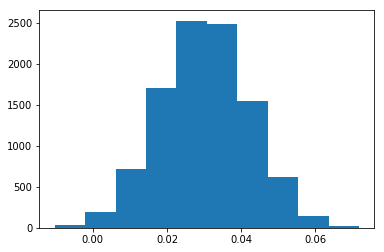

In [93]:
plt.hist(diffs)

In [94]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

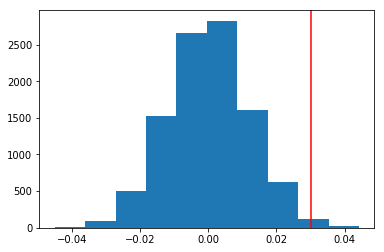

In [95]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color="red")

In [96]:
# p-value 
(null_vals > obs_diff).mean()

0.0064000000000000003

**With a p-value of less than 0.01, we can reject the null hyphothesis.**   
**It looks like Audacity lanch the new version of the homepage.**